In [1]:
import sys; sys.path.insert(0, '..') # necessary for successful custom module imports
import pandas as pd
import numpy as np
from scipy.optimize import Bounds
from models.jump_vasicek import JumpVasicek
from calibration.mle_calibration import Calibration

In [13]:
# For 3 month Maturity
df_3mo_yc = pd.read_csv("../data/DGS3MO.csv")
df_3mo_yc.index = pd.to_datetime(df_3mo_yc.DATE)
df_3mo_yc = df_3mo_yc.dropna().drop(columns=["DATE"])
df_3mo_yc.DGS3MO = df_3mo_yc.DGS3MO.replace(".", np.nan).astype(float)/100
df_3mo_yc = df_3mo_yc.dropna()
df_3mo_yc = df_3mo_yc.iloc[-int(252*3):-1, :] # last 1 years (252)
df_3mo_yc

,DGS3MO
DATE,
2018-02-08,0.0155
2018-02-09,0.0155
2018-02-12,0.0162
2018-02-13,0.0159
2018-02-14,0.0158
...,...
2021-02-10,0.0005
2021-02-11,0.0005
2021-02-12,0.0004


<AxesSubplot:xlabel='DATE'>

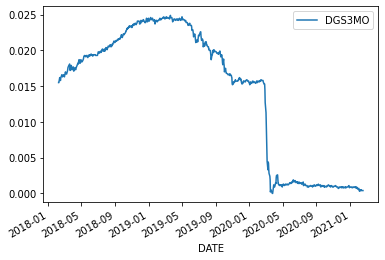

In [14]:
df_3mo_yc.plot()

In [22]:
inital_model_params = {
    "kappa": 0.5,
    "mu_r": 0.03,
    "sigma": 0.03,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}
calibrator = Calibration(
    df_3mo_yc.DGS3MO, dt=1/252, model_class=JumpVasicek,
    initial_params=inital_model_params)
bounds = Bounds([0.001, 0.001, 0.001, 0.001, 0.1], [1, 0.1, 0.5, 0.1, 100])
calibrator.calibrate(bounds=bounds, params=("kappa", "mu_r", "sigma", "gamma", "h"))

Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.936056953198035
Params: {'kappa': 0.50000001, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.936056953187597
Params: {'kappa': 0.5, 'mu_r': 0.03000001, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.93605695294858
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03000001, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.936056627919065
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01000001, 'h': 10.0}
Neg Log Likelihood: -11.936056946076707
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.00000001}
Neg Log Likelihood: -11.936056953165737
Params: {'kappa': 0.49895621272130564, 'mu_r': 0.005054443271897892, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996770227995027}
Neg Log Likelihood: -14.424829614324057
Params: {'kappa': 0.4989562227213

Params: {'kappa': 0.49500200786802595, 'mu_r': 0.005442844156611216, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996351475845426}
Neg Log Likelihood: -14.425035986291634
Params: {'kappa': 0.49500199786802596, 'mu_r': 0.005442854156611216, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996351475845426}
Neg Log Likelihood: -14.425035988022692
Params: {'kappa': 0.49500199786802596, 'mu_r': 0.005442844156611216, 'sigma': 0.00100001, 'mu': 0, 'gamma': 0.001, 'h': 9.996351475845426}
Neg Log Likelihood: -14.425033595989513
Params: {'kappa': 0.49500199786802596, 'mu_r': 0.005442844156611216, 'sigma': 0.001, 'mu': 0, 'gamma': 0.00100001, 'h': 9.996351475845426}
Neg Log Likelihood: -14.425035928993992
Params: {'kappa': 0.49500199786802596, 'mu_r': 0.005442844156611216, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996351485845427}
Neg Log Likelihood: -14.425035986582207
Params: {'kappa': 0.4882020935796266, 'mu_r': 0.004901357747460492, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.9956

      fun: -14.43052783733201
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.57935903e-04,  5.62989655e-02,  2.53969377e+02,  5.71600083e+00,
        3.36566330e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 13
   status: 0
  success: True
        x: array([1.77987171e-01, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       9.96267272e+00])

In [18]:
# For 1 year maturity
df_1y_yc = pd.read_csv("../data/DGS1.csv")
df_1y_yc.index = pd.to_datetime(df_1y_yc.DATE)
df_1y_yc = df_1y_yc.dropna().drop(columns=["DATE"])
df_1y_yc.DGS1 = df_1y_yc.DGS1.replace(".", np.nan).astype(float)/100
df_1y_yc = df_1y_yc.dropna()
df_1y_yc = df_1y_yc.iloc[-int(252*3):-1, :] # last 1 years (252)
df_1y_yc

,DGS1
DATE,
2018-02-08,0.0191
2018-02-09,0.0189
2018-02-12,0.0193
2018-02-13,0.0195
2018-02-14,0.0198
...,...
2021-02-10,0.0007
2021-02-11,0.0007
2021-02-12,0.0006


<AxesSubplot:xlabel='DATE'>

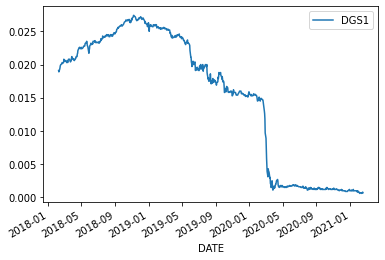

In [19]:
df_1y_yc.plot()

In [23]:
inital_model_params = {
    "kappa": 0.5,
    "mu_r": 0.03,
    "sigma": 0.03,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}
calibrator = Calibration(
    df_1y_yc.DGS1, dt=1/252, model_class=JumpVasicek,
    initial_params=inital_model_params)
bounds = Bounds([0.001, 0.001, 0.001, 0.001, 0.1], [1, 0.1, 0.5, 0.1, 100])
calibrator.calibrate(bounds=bounds, params=("kappa", "mu_r", "sigma", "gamma", "h"))

Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.935604345770763
Params: {'kappa': 0.50000001, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.935604345759597
Params: {'kappa': 0.5, 'mu_r': 0.03000001, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.93560434549763
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03000001, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.935604020982085
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01000001, 'h': 10.0}
Neg Log Likelihood: -11.935604338646304
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.00000001}
Neg Log Likelihood: -11.935604345738469
Params: {'kappa': 0.498883382090781, 'mu_r': 0.0026867372380667, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996770583266052}
Neg Log Likelihood: -14.38107230022719
Params: {'kappa': 0.498883392090781, '

Params: {'kappa': 0.49264269296496077, 'mu_r': 0.007527338427022577, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996519737664945}
Neg Log Likelihood: -14.385040509108604
Params: {'kappa': 0.4926426829649608, 'mu_r': 0.007527348427022577, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996519737664945}
Neg Log Likelihood: -14.385040510765105
Params: {'kappa': 0.4926426829649608, 'mu_r': 0.007527338427022577, 'sigma': 0.00100001, 'mu': 0, 'gamma': 0.001, 'h': 9.996519737664945}
Neg Log Likelihood: -14.385037881018764
Params: {'kappa': 0.4926426829649608, 'mu_r': 0.007527338427022577, 'sigma': 0.001, 'mu': 0, 'gamma': 0.00100001, 'h': 9.996519737664945}
Neg Log Likelihood: -14.385040450526308
Params: {'kappa': 0.4926426829649608, 'mu_r': 0.007527338427022577, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996519747664946}
Neg Log Likelihood: -14.385040509785933
Params: {'kappa': 0.48976638287674734, 'mu_r': 0.007031908991082728, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.9963941

Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.00100001, 'mu': 0, 'gamma': 0.001, 'h': 9.96490183377159}
Neg Log Likelihood: -14.406378996252977
Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.00100001, 'h': 9.96490183377159}
Neg Log Likelihood: -14.406381810058969
Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.96490184377159}
Neg Log Likelihood: -14.406381867934957
Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.955805422504026}
Neg Log Likelihood: -14.40641236651973
Params: {'kappa': 0.00100001, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.955805422504026}
Neg Log Likelihood: -14.406412366398628
Params: {'kappa': 0.001, 'mu_r': 0.00100001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.955805422504026}
Neg Log Likelihood: -14.406412366516122
Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.00100001, 'mu': 0, 'gamma': 0.001, 'h': 9.955805422504026}
Neg 

      fun: -14.439438535067257
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.21874066e-02, 3.63087338e-04, 2.88902809e+02, 5.84689630e-02,
       3.34932082e-03])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 138
      nit: 14
   status: 0
  success: True
        x: array([0.001, 0.001, 0.001, 0.001, 0.1  ])

In [25]:
# For 1o year maturity
df_10y_yc = pd.read_csv("../data/DGS10.csv")
df_10y_yc.index = pd.to_datetime(df_10y_yc.DATE)
df_10y_yc = df_10y_yc.dropna().drop(columns=["DATE"])
df_10y_yc.DGS10 = df_10y_yc.DGS10.replace(".", np.nan).astype(float)/100
df_10y_yc = df_10y_yc.dropna()
df_10y_yc = df_10y_yc.iloc[-int(252*3):-1, :] # last 1 years (252)
df_10y_yc

,DGS10
DATE,
2018-02-08,0.0285
2018-02-09,0.0283
2018-02-12,0.0286
2018-02-13,0.0283
2018-02-14,0.0291
...,...
2021-02-10,0.0115
2021-02-11,0.0116
2021-02-12,0.0120


<AxesSubplot:xlabel='DATE'>

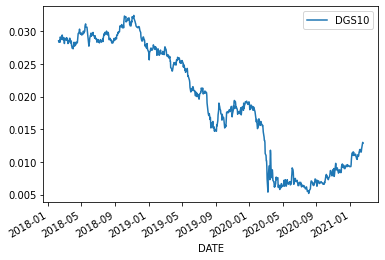

In [26]:
df_10y_yc.plot()

In [27]:
inital_model_params = {
    "kappa": 0.5,
    "mu_r": 0.03,
    "sigma": 0.03,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}
calibrator = Calibration(
    df_10y_yc.DGS10, dt=1/252, model_class=JumpVasicek,
    initial_params=inital_model_params)
bounds = Bounds([0.001, 0.001, 0.001, 0.001, 0.1], [1, 0.1, 0.5, 0.1, 100])
calibrator.calibrate(bounds=bounds, params=("kappa", "mu_r", "sigma", "gamma", "h"))

Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.919090458894564
Params: {'kappa': 0.50000001, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.919090458889686
Params: {'kappa': 0.5, 'mu_r': 0.03000001, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.919090458680703
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03000001, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -11.919090144212948
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01000001, 'h': 10.0}
Neg Log Likelihood: -11.919090451665145
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.00000001}
Neg Log Likelihood: -11.919090458862385
Params: {'kappa': 0.4995122124118813, 'mu_r': 0.008613907102558768, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996782129585299}
Neg Log Likelihood: -13.599883236892584
Params: {'kappa': 0.4995122224118

Params: {'kappa': 0.49793595531757723, 'mu_r': 0.011834083224088184, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996687460879047}
Neg Log Likelihood: -13.600639822772068
Params: {'kappa': 0.49793595531757723, 'mu_r': 0.011834073224088184, 'sigma': 0.00100001, 'mu': 0, 'gamma': 0.001, 'h': 9.996687460879047}
Neg Log Likelihood: -13.600638360728354
Params: {'kappa': 0.49793595531757723, 'mu_r': 0.011834073224088184, 'sigma': 0.001, 'mu': 0, 'gamma': 0.00100001, 'h': 9.996687460879047}
Neg Log Likelihood: -13.600639710312546
Params: {'kappa': 0.49793595531757723, 'mu_r': 0.011834073224088184, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996687470879047}
Neg Log Likelihood: -13.600639822858879
Params: {'kappa': 0.4979205746513334, 'mu_r': 0.01177516965031294, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.99668600731564}
Neg Log Likelihood: -13.600640794380238
Params: {'kappa': 0.4979205846513334, 'mu_r': 0.01177516965031294, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.99668600

Params: {'kappa': 0.42433229483956925, 'mu_r': 0.00588389548127146, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.991349962241634}
Neg Log Likelihood: -13.60205433672969
Params: {'kappa': 0.42433229483956925, 'mu_r': 0.00588388548127146, 'sigma': 0.00100001, 'mu': 0, 'gamma': 0.001, 'h': 9.991349962241634}
Neg Log Likelihood: -13.602052999998678
Params: {'kappa': 0.42433229483956925, 'mu_r': 0.00588388548127146, 'sigma': 0.001, 'mu': 0, 'gamma': 0.00100001, 'h': 9.991349962241634}
Neg Log Likelihood: -13.602054219688098
Params: {'kappa': 0.42433229483956925, 'mu_r': 0.00588388548127146, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.991349972241634}
Neg Log Likelihood: -13.602054332002892
Params: {'kappa': 0.12052942632565372, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.969365898376012}
Neg Log Likelihood: -13.609512697675205
Params: {'kappa': 0.12052943632565372, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.969365898376012}
Neg Log Likelihood: -

      fun: -13.60961623028452
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.94155803e-04,  1.28977362e-01,  1.77528597e+02,  1.11264448e+01,
        2.67093014e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 126
      nit: 18
   status: 0
  success: True
        x: array([1.45103868e-01, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       9.97114385e+00])